
# Importations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
housing = pd.read_csv("housing.csv")

# Look at first 5 rows

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Look at summary of numerical attributes

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Plot 

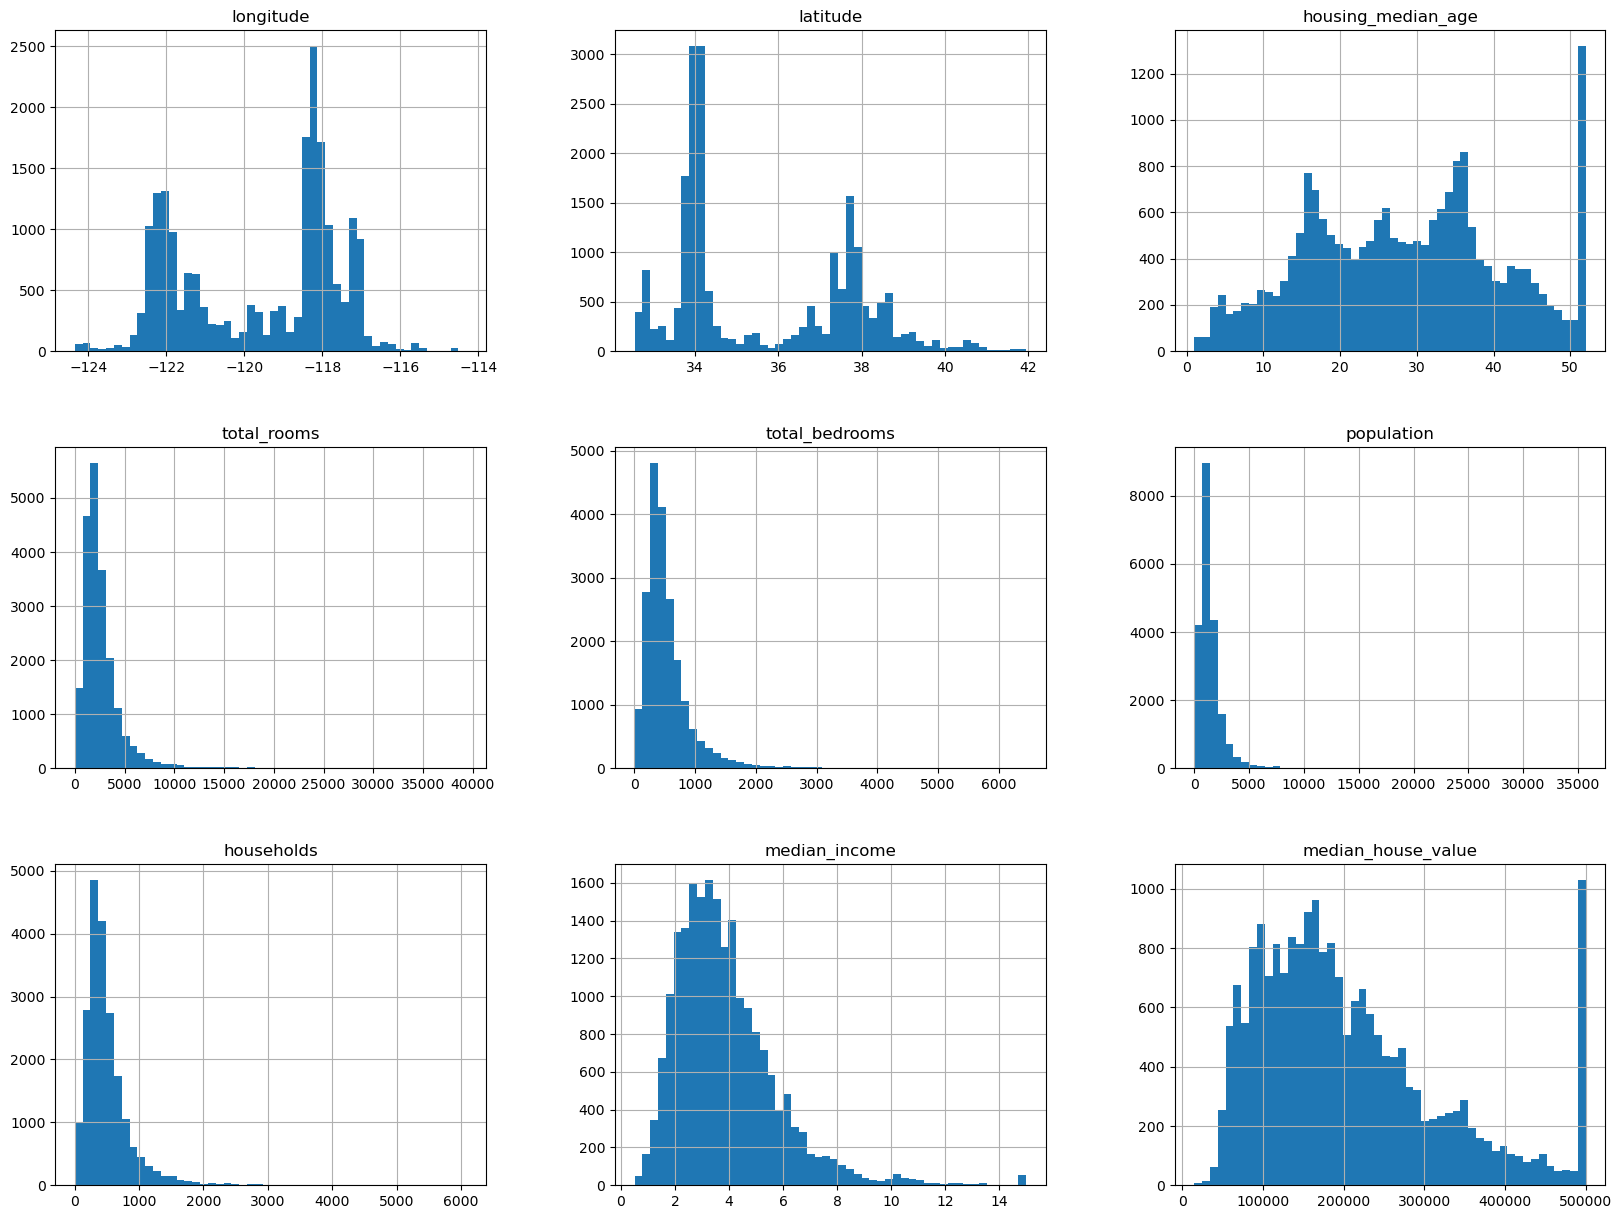

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Visualize Geographical Data

<Axes: xlabel='latitude', ylabel='longitude'>

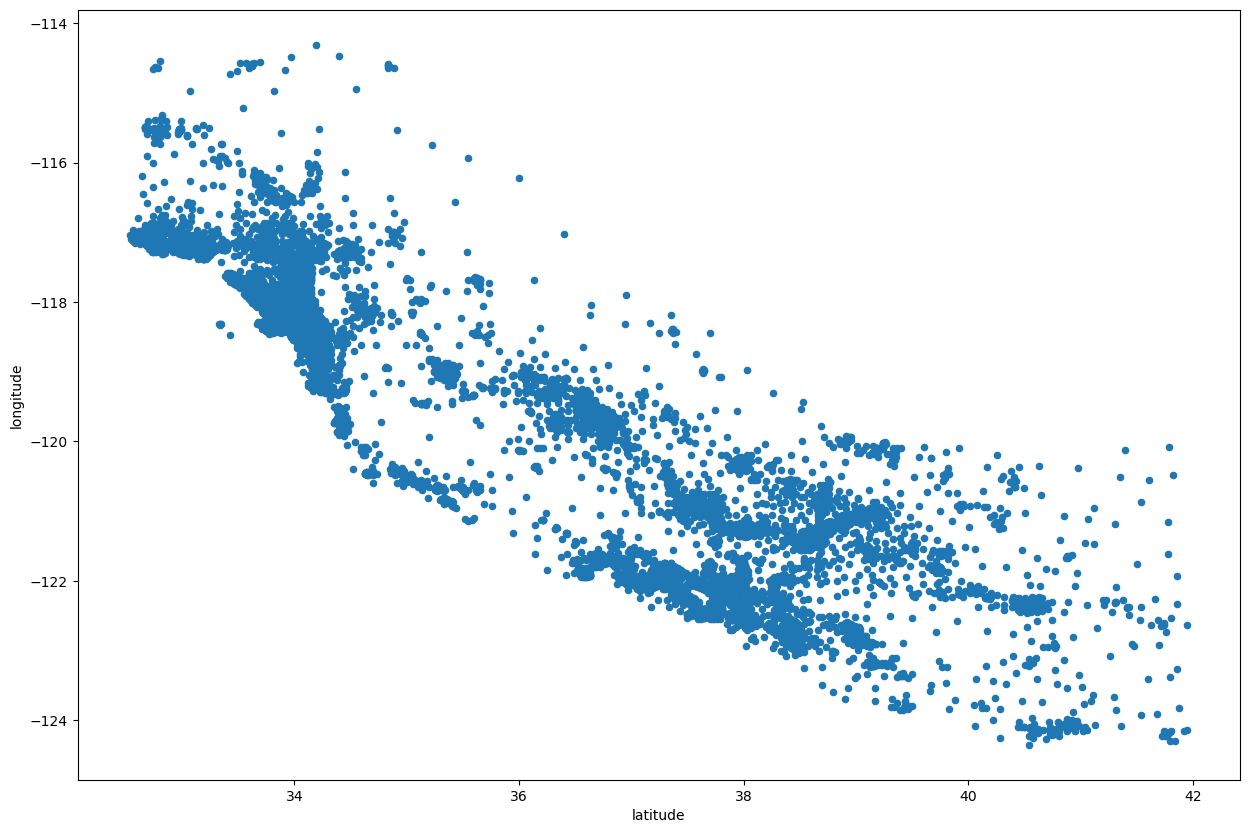

In [8]:
housing.plot(kind="scatter", x="latitude", y="longitude", figsize=(15,10))

<Axes: xlabel='latitude', ylabel='longitude'>

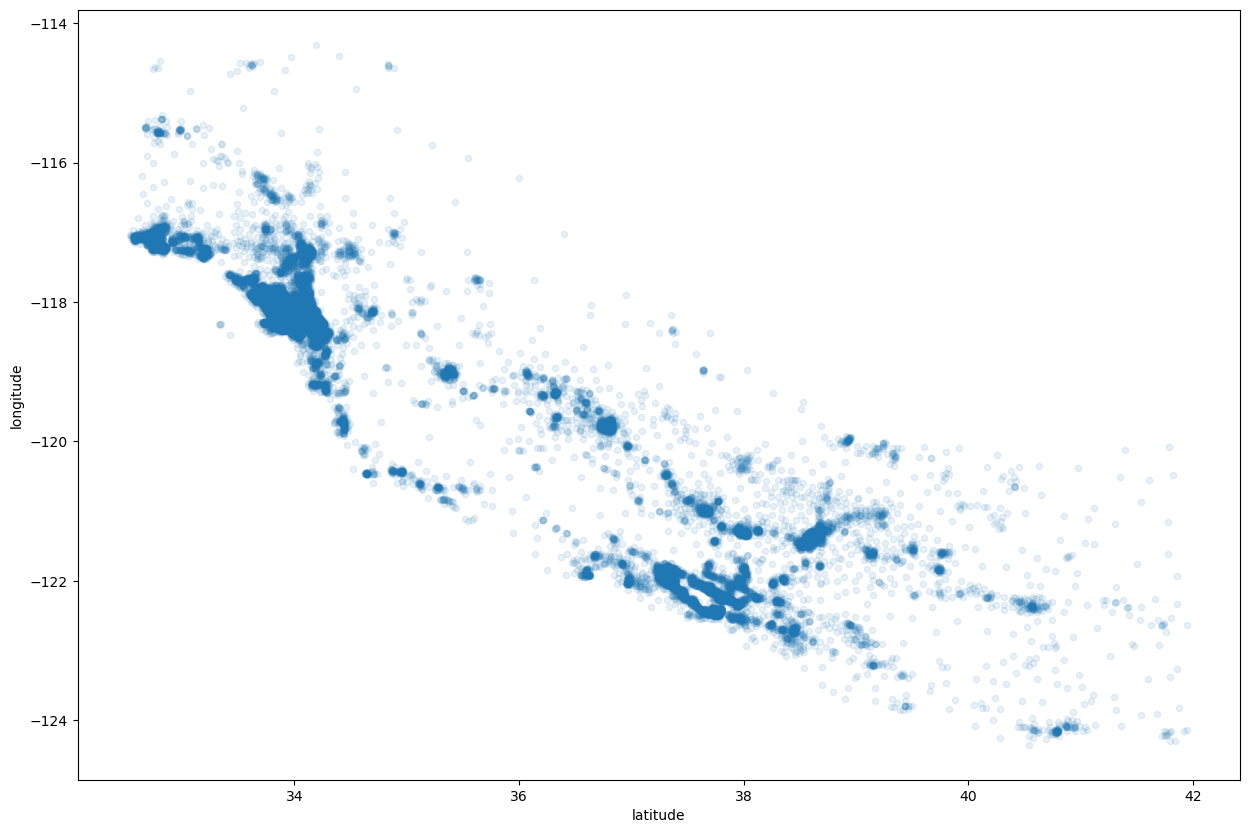

In [9]:
housing.plot(kind="scatter", x="latitude", y="longitude", alpha=0.1, figsize=(15,10))

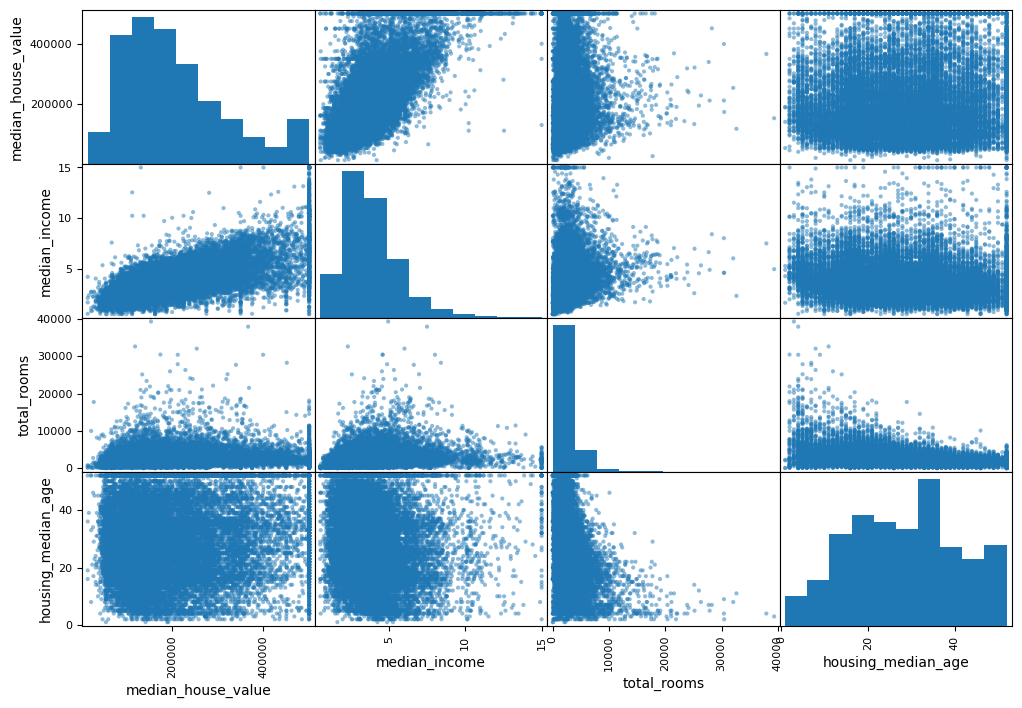

In [10]:
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8));

<Axes: xlabel='median_income', ylabel='median_house_value'>

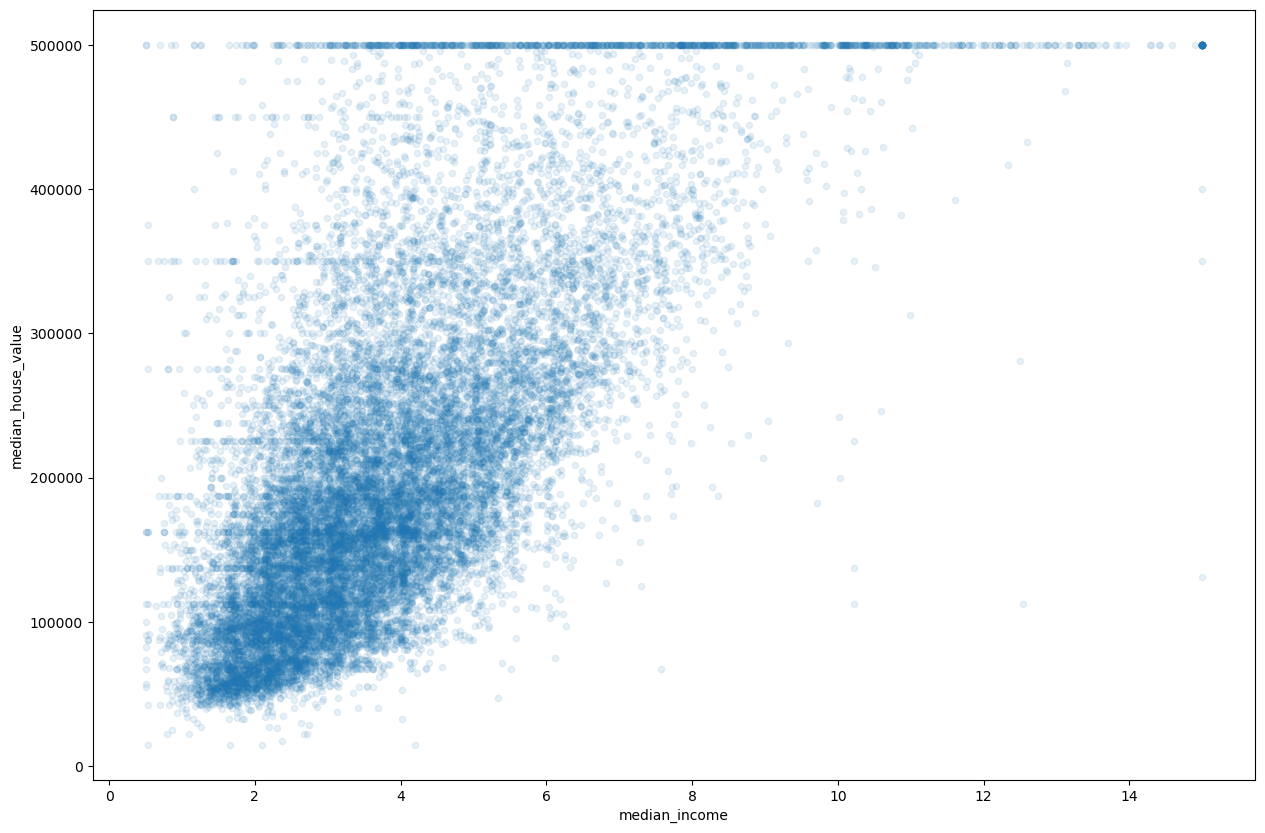

In [11]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(15,10))

In [12]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [13]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

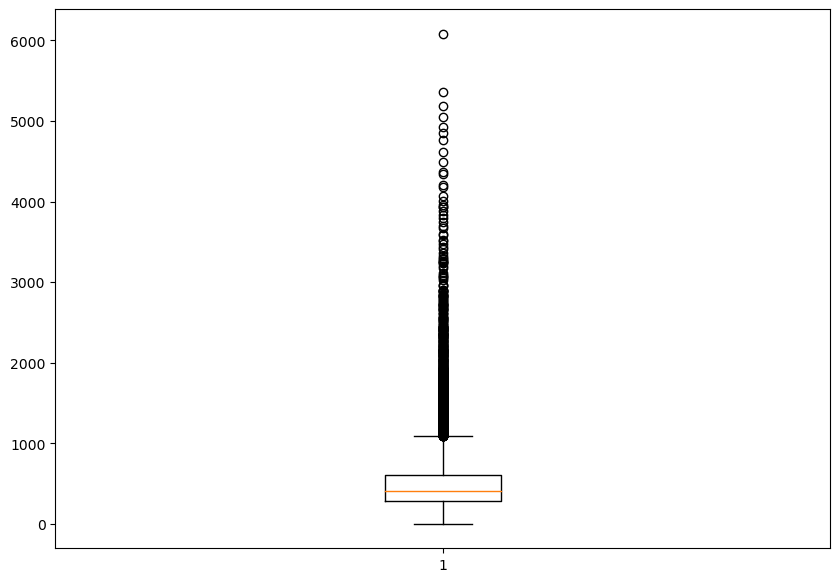

In [15]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(housing['households'])
plt.show()

longitude


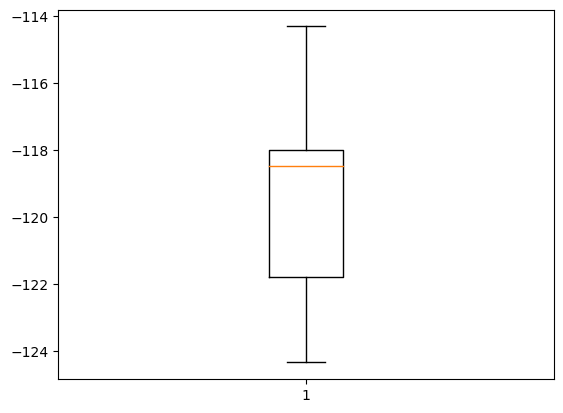

latitude


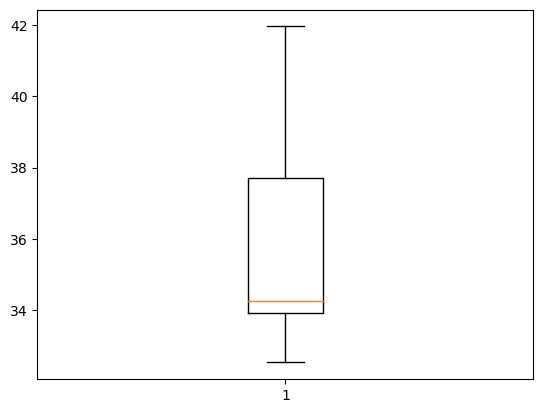

housing_median_age


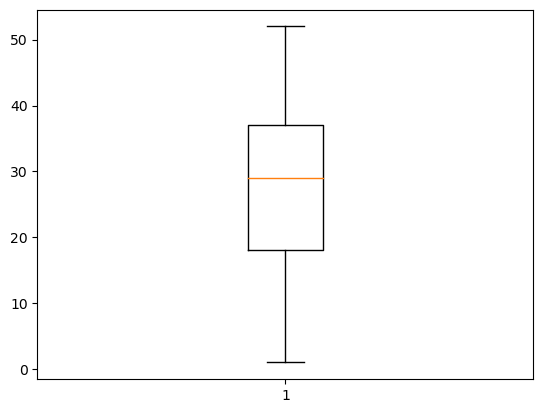

total_rooms


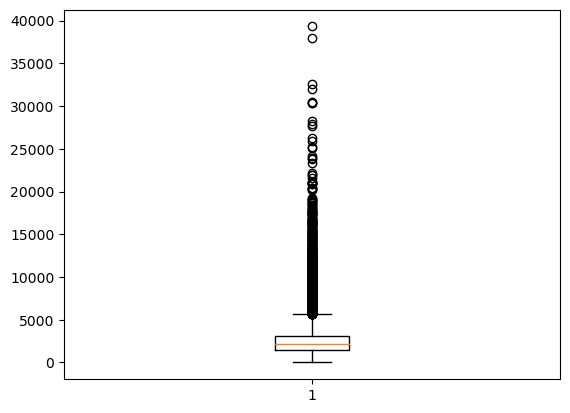

total_bedrooms


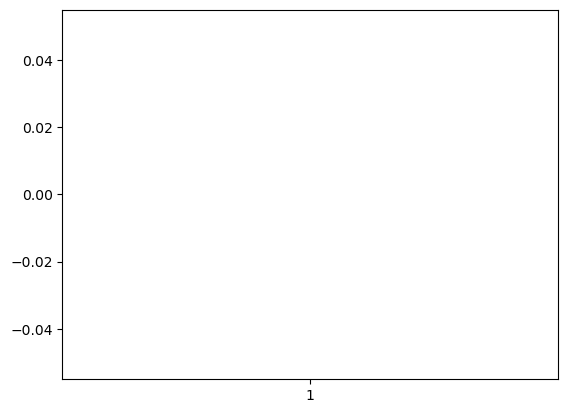

population


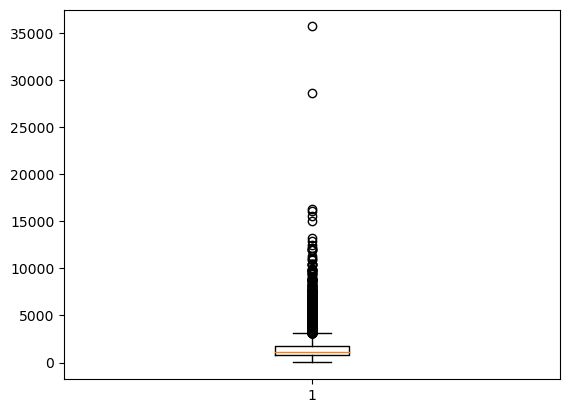

households


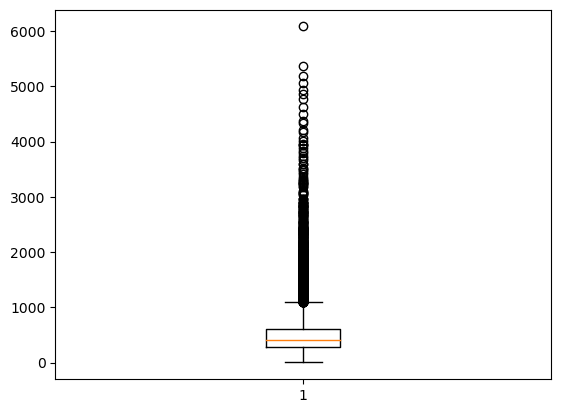

median_income


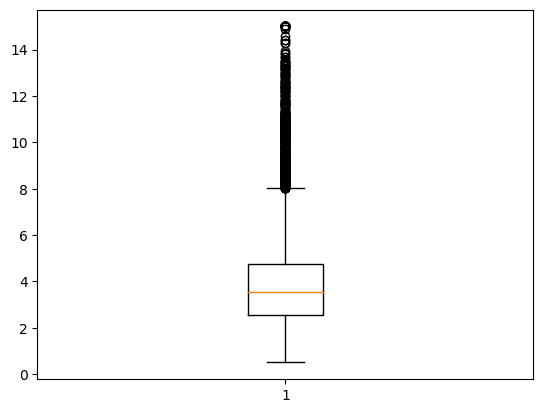

median_house_value


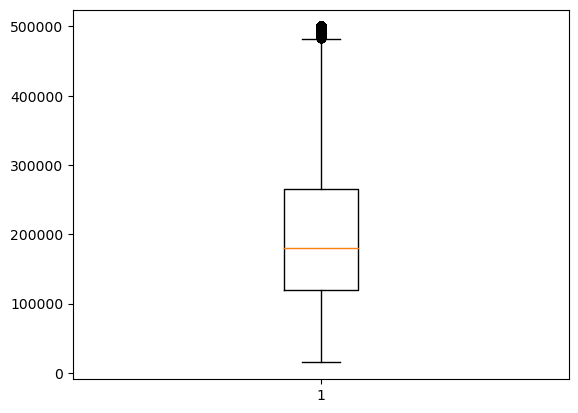

In [16]:
for col in['longitude','latitude','housing_median_age',
           'total_rooms','total_bedrooms','population',
           'households','median_income','median_house_value']: # exlcude ocean_proximity since not numerical variable
    print(col)
    plt.boxplot(housing[col])
    plt.show()

In [17]:
housing.total_bedrooms.isnull().sum()

207

SPLIT DATA

In [18]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
train.shape, test.shape


((16512, 10), (4128, 10))

In [20]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
train_num=train.drop("ocean_proximity", axis=1)

In [23]:
imputer.fit(train_num)


SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [25]:
train_num.median().values

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [26]:
X=imputer.transform(train_num)

In [27]:
train_tr=pd.DataFrame(X, columns=train_num.columns)

In [28]:
train_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Handling Catergorical Features

In [29]:
train_cat=train[["ocean_proximity"]]
train_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [30]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [31]:
train_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [32]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Feature Engineering

In [33]:
train["rooms_per_household"]=train["total_rooms"]/train["households"]
train["bedrooms_per_room"]=train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"]=train["population"]/train["households"]

In [34]:
corr_matrix=train.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [35]:
train_labels=train['median_house_value'].copy()
# drop the labels from the train set via the pandas drop function:\
train =train.drop('median_house_value', axis=1)
# axis=1 means that␣↪median_house_value should be dropped column wise, \
#meaning, the whole column␣↪will be dropped
train_num=train.drop("ocean_proximity", axis=1)#  re-do since the additional \
#columns rooms_per_household, bedrooms_per_room and population_per_household 
#where added
train_labels.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

Feature Scaling

In [36]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,6.268421,0.180940,2.300000


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([('imputer', 
                        SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])
train_num_tr = num_pipeline.fit_transform(train_num)

In [38]:
from sklearn.compose import ColumnTransformer
num_attribs=list(train_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([("num", num_pipeline, num_attribs), ("cat",OneHotEncoder(), cat_attribs) ])
train_prepared=full_pipeline.fit_transform(train)

Linear Regression model

In [39]:
train_prepared.shape

(16512, 16)

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [41]:
some_data=train.iloc[:5]
some_labels=train_labels.iloc[:5]
# transform / prepare some data
some_data_prepared=full_pipeline.transform(some_data)
# make predictions
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]


In [42]:
print("Labels:",list(some_labels))

Labels: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [43]:
from sklearn.metrics import mean_squared_error
train_predictions=lin_reg.predict(train_prepared)
lin_mse=mean_squared_error(train_labels, train_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

67593.20745775253

Decision Tree model

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor()

In [45]:
train_predictions=tree_reg.predict(train_prepared)
tree_mse=mean_squared_error(train_labels, train_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

Cross-Validation

In [46]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [47]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [64861.84092943 71117.42024137 68884.58793105 71416.77656095
 72797.32649904 65851.0252503  67474.36200751 68519.72749423
 66949.45857188 70619.76002795]
Mean: 68849.22855137089
Standard deviation: 2468.9460046945924


In [48]:
lin_scores=cross_val_score(lin_reg, train_prepared,train_labels,scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores=np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)


Scores: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
Mean: 67828.38677377408
Standard deviation: 2468.0913950652284


Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)
train_predictions=forest_reg.predict(train_prepared)
forest_mse=mean_squared_error(train_labels, train_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18408.408506521235

In [50]:
forest_scores=cross_val_score(forest_reg, train_prepared,train_labels,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores=np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [46999.06966264 51403.7641311  49708.51360929 51468.57965378
 52534.45116507 47476.19854466 47449.73534108 51006.85584052
 49352.12664133 50048.63797185]
Mean: 49744.79325613186
Standard deviation: 1824.8082877156485


Grid Search

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid=[ {'n_estimators': [3,10,30],'max_features':\
              [2,4,6,8]},{'bootstrap': [False],'n_estimators'\
                            : [3,10],'max_features': [2,3,4]},]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg, param_grid,\
                         cv=5,scoring='neg_mean_squared_error',\
                         return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
grid_search.best_params_ # our result {'max_features': 8, 'n_estimators': 30}
# Since 8 and 30 are the maximum values that were evaluated, you should␣↪probably try searching again with higher values, since the score may␣↪continue to improve.

{'max_features': 6, 'n_estimators': 30}

In [53]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [54]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63300.99678752491 {'max_features': 2, 'n_estimators': 3}
55018.268142304674 {'max_features': 2, 'n_estimators': 10}
52433.30812572776 {'max_features': 2, 'n_estimators': 30}
60589.10844211093 {'max_features': 4, 'n_estimators': 3}
52227.19646637549 {'max_features': 4, 'n_estimators': 10}
50346.17214180148 {'max_features': 4, 'n_estimators': 30}
59302.079485778064 {'max_features': 6, 'n_estimators': 3}
52223.37205783042 {'max_features': 6, 'n_estimators': 10}
50034.22802311825 {'max_features': 6, 'n_estimators': 30}
59450.72624988728 {'max_features': 8, 'n_estimators': 3}
51899.447739274874 {'max_features': 8, 'n_estimators': 10}
50161.08779476873 {'max_features': 8, 'n_estimators': 30}
61606.05393204857 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54075.75875188009 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59963.26101002312 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52531.32802162939 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [55]:
import pickle
#from sklearn.externals import joblib
filename='forest_housing_model.pkl'
#joblib.dump(grid_search.best_estimator_,filename)
filename='forest_housing_model.sav'
pickle.dump(grid_search.best_estimator_,open(filename,'wb'))

In [56]:
# if you want re-load the model you can use the following code:
model = pickle.load(open(filename,'rb'))

## Data Preparation
### 1.1 Read Data

In [58]:
housing = pd.read_csv("housing.csv")

In [59]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(housing, test_size=0.2, random_state=42)

In [60]:
test.shape

(4128, 10)

### 1.2 Clean Data

In [61]:
test_num=test.drop("ocean_proximity", axis=1)

In [62]:
imputer.fit(test_num)


SimpleImputer(strategy='median')

In [63]:
imputer.statistics_

array([-1.1847e+02,  3.4230e+01,  2.9000e+01,  2.1100e+03,  4.2800e+02,
        1.1600e+03,  4.0600e+02,  3.5000e+00,  1.7865e+05])

In [64]:
test_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.16700000e+03,  4.10000000e+02,  3.54580000e+00,
        5.23587365e+00,  2.02807652e-01,  2.81723971e+00])

In [65]:
X=imputer.transform(test_num)

In [66]:
test_tr=pd.DataFrame(X, columns=test_num.columns)

In [67]:
test_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [68]:
test_cat=test[["ocean_proximity"]]
test_cat.head(10)

,ocean_proximity
20046,INLAND
3024,INLAND
15663,NEAR BAY
20484,<1H OCEAN
9814,NEAR OCEAN
13311,INLAND
7113,<1H OCEAN
7668,<1H OCEAN
18246,NEAR BAY
5723,<1H OCEAN


In [69]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
test_cat_1hot = cat_encoder.fit_transform(test_cat)
test_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [70]:
test_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [71]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [72]:
test["rooms_per_household"]=test["total_rooms"]/test["households"]
test["bedrooms_per_room"]=test["total_bedrooms"]/test["total_rooms"]
test["population_per_household"]=test["population"]/test["households"]

In [73]:
corr_matrix=test.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.677502
total_rooms                 0.134697
rooms_per_household         0.130928
housing_median_age          0.113585
households                  0.074249
total_bedrooms              0.056667
population                 -0.019003
longitude                  -0.044062
population_per_household   -0.121853
latitude                   -0.149295
bedrooms_per_room          -0.249196
Name: median_house_value, dtype: float64

In [74]:
test_labels=test['median_house_value'].copy()
# drop the labels from the train set via the pandas drop function:\
test =test.drop('median_house_value', axis=1)
# axis=1 means that␣↪median_house_value should be dropped column wise, \
#meaning, the whole column␣↪will be dropped
test_num=test.drop("ocean_proximity", axis=1)#  re-do since the additional \
#columns rooms_per_household, bedrooms_per_room and population_per_household 
#where added
test_labels.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [75]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,NaN,2.483645


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([('imputer', 
                        SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])
test_num_tr = num_pipeline.fit_transform(test_num)

In [77]:
from sklearn.compose import ColumnTransformer
num_attribs=list(test_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([("num", num_pipeline, num_attribs), ("cat",OneHotEncoder(), cat_attribs) ])
test_prepared=full_pipeline.fit_transform(test)

Linear Regression model

In [80]:
test_prepared.shape

(4128, 16)

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(test_prepared, test_labels)

ValueError: Found input variables with inconsistent numbers of samples: [4128, 16512]